### [进入新手村](https://quarkstudio.readthedocs.io/en/latest/usage/beginner/)

### 离线测试

#### 生成表
- 单比特门在Qubit节点
- 两比特门在Coupler节点

In [ ]:
Q0 = {  # qubit
    "Measure": {  # 生成读取波形，送入probe通道
        "duration": 4e-06,
        "amp": 0.019,
        "frequency": 6964370000.0,
        "weight": "const(1)",
        "phi": -2.636421695283167,
        "threshold": 8502633802.265065,
        "ring_up_amp": 0.024,
        "ring_up_waist": 0.006,
        "ring_up_time": 0e-07,
    },
    'R': {'width': 2.1e-08,
          'amp': 0.5140937118030053,
          'frequency': 4473337704.6286335,
          'delta': 947840.2529478334,
          'plateau': 2.1e-08
          },
    "acquire": {  # 采集通道（从制冷机出来的信号）
        "address": "AD.CH13.IQ",
        "TRIGD": 0  # 采集延时
    },
    'drive': {
        "address": "AWG.CH8.Waveform"
    },
    "probe": {  # 读取通道（进入制冷机的信号）
        "address": "AWG.CH2.Waveform",
        "delay": 0e-6
    },
    "flux": {  # 偏置通道
        "address": "AWG.CH21.Waveform",
        "delay": 2e-6
    },
    "topoinfo": {
            "couplers": [
                "Q0_Q1" # Coupler，两比特门必须！
            ],
            "NQ": [
                "Q65"
            ],
            "HNNQ": [
                "Q70"
            ],
            "VNNQ": [
                "Q59"
            ]
        }
}

Q1 = {  # qubit
    "Measure": {  # 生成读取波形，送入probe通道
        "duration": 4e-06,
        "amp": 0.019,
        "frequency": 6964370000.0,
        "weight": "const(1)",
        "phi": -2.636421695283167,
        "threshold": 8502633802.265065,
        "ring_up_amp": 0.024,
        "ring_up_waist": 0.006,
        "ring_up_time": 0e-07,
    },
    'R': {'width': 2.1e-08,
          'amp': 0.5140937118030053,
          'frequency': 4473337704.6286335,
          'delta': 947840.2529478334,
          'plateau': 2.1e-08
          },
    "acquire": {  # 采集通道（从制冷机出来的信号）
        "address": "AD.CH13.IQ",
        "TRIGD": 0  # 采集延时
    },
    'drive': {
        "address": "AWG.CH4.Waveform"
    },
    "probe": {  # 读取通道（进入制冷机的信号）
        "address": "AWG.CH2.Waveform",
        "delay": 0e-6
    },
    "flux": {  # 偏置通道
        "address": "AWG.CH22.Waveform",
        "delay": 2e-6
    },
    "topoinfo": {
            "couplers": [
                "Q0_Q1" # Coupler，两比特门必须！
            ],
            "NQ": [
                "Q65"
            ],
            "HNNQ": [
                "Q70"
            ],
            "VNNQ": [
                "Q59"
            ]
        }
}

Q0_Q1 = {  # 命名含义：Q0和Q1之间的coupler
    "CZ": {
        "width": 5e-08,
        "ampc": 0.2557345850244436,
        "plateau": 4.5e-07,
        "before": 5e-09,
        "after": 3.5e-08,
        "shape": "coshPulse",
        "phi1": 0,
        "phi2": 0
    },  
    "flux": {
        "address": "AWG.CH23.Waveform",
        "delay": 2e-6
    }
}


station = {  # 一些全局设置
    "sample": "sample2025",  # 样品名，仅记录用
    "triggercmds": ["Trigger.CH1.TRIG"],  # 触发命令
    "lib": "glib.gates.u3rcp",  # gate库路径
    "arch": "rcp",  # 体系结构，位于lib.arch
    "align_right": False,  # 波形是否右侧对齐
    "waveform_length": 18e-6,  # 波形总长度
    "auto_clear": {  # 自动清空的命令
        "init": ['flux', 'drive'],  # 任务初始化时，清空flux和drive通道
        "main": ['flux', 'drive'],  # 任务主循环中，清空flux和drive通道
        "post": ['flux', 'drive']  # 任务结束后，清空flux和drive通道
    },
}


dev = {  # 设备列表
    'AD': {  # 采集卡
        "addr": "192.168.1.2",  # 设备板卡ip
        "name": "dev.VirtualDevice",  # 设备模块路径，使用时替换成实际设备驱动
        "type": "driver",  # 直连设备，即无需通过remote服务
        "srate": 1e9,  # 采样率，读取自设备驱动的srate属性
    },
    'AWG': {  # 任意波形发生器
        "host": "192.168.1.3",  # 设备内操作系统的ip
        "port": 8000,  # 设备remote服务端口
        "type": "remote",  # 远程设备，通过remote服务连接，需在设备上运行remote服务
        "srate": 5e9,
    },
    'Trigger': {  # 触发源
        "addr": "192.168.1.4",
        "name": "dev.VirtualDevice",
        "type": "driver",
        "srate": 2e9
    }
}

cfg = {'Q0': Q0, 'Q1': Q1,'Q0_Q1':Q0_Q1, 'station': station, 'dev': dev}


In [30]:
flux = 1
cc = [(('SET', 'flux', 'zero()'), 'Q0')] if flux == 0 else [
    (('setBias', 'flux', flux), 'Q0')]
cc += [('X', 'Q0'), ('Y', 'Q1'), ('CZ', ('Q0', 'Q1'))]
cc += [(('Measure', 0), 'Q0'), (('Measure', 0), 'Q1')]

#### 编译线路

2026-02-11 10:59:44.119 | INFO     | quark.runtime.assembler:schedule:72 - 🔗 Step(0): compiling ...
2026-02-11 10:59:44.122 | INFO     | quark.runtime.assembler:schedule:89 - ✅ Step(0): compiled!


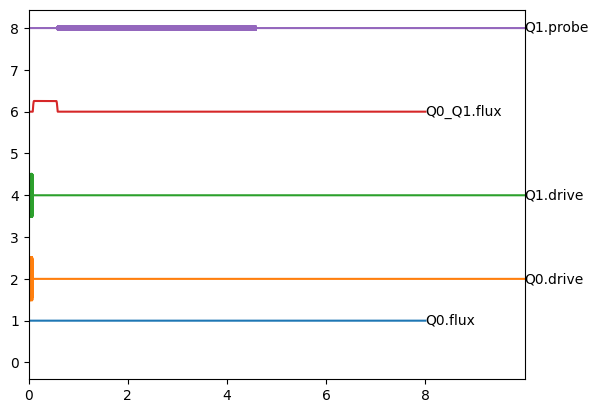

In [39]:
# 测试参数表与qlisp线路

from quark.app import s

# ctx  编译所用的上下文环境
# cmds 实验中实际执行的指令
# dmap 数据处理所需要的参数
ctx, (cmds, dmap) = s.translate(cc, cfg=cfg)
wf = s.preview(cmds['main'],
               keys=['QC', 'Q0', 'Q1', 'Q0_Q1'],
               end=10e-6,
               offset=2)

#### 查看命令

In [38]:
s.display(cmds, title='cmds',end='')

cmds
├── main
│   ├── AWG.CH21.Waveform
│   │   ├── ctype: WRITE
│   │   ├── value: <waveforms.waveform.Waveform object at 0x000002A53A039380>
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: Q0.flux
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── delay: 2e-06
│   │           ├── end: 1.8e-05
│   │           └── srate: 5000000000.0
│   ├── AWG.CH8.Waveform
│   │   ├── ctype: WRITE
│   │   ├── value: <waveforms.waveform.Waveform object at 0x000002A53A039150>
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: Q0.drive
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── end: 1.8e-05
│   │           └── srate: 5000000000.0
│   ├── AWG.CH4.Waveform
│   │   ├── ctype: WRITE
│   │   ├── value: <waveforms.waveform.Waveform object at 0x000002A53A0395B0>
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: Q1.drive
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── end: 1.8e-05
│   │           └── srate: 5000000000.0
│   ├── AWG.CH23.Waveform
│   │   ├── ctype: WRITE
│   │   ├── value: <waveforms.waveform.Waveform object at 0x000002A53A039540>
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: Q0_Q1.flux
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── delay: 2e-06
│   │           ├── end: 1.8e-05
│   │           └── srate: 5000000000.0
│   ├── AWG.CH2.Waveform
│   │   ├── ctype: WRITE
│   │   ├── value: <waveforms.waveform.Waveform object at 0x000002A53A039690>
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: Q1.probe
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── delay: 0.0
│   │           ├── end: 1.8e-05
│   │           └── srate: 5000000000.0
│   ├── AD.CH13.Shot
│   │   ├── ctype: WRITE
│   │   ├── value: 1024
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: AD.CH13.Shot
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── end: None
│   │           └── srate: 1000000000.0
│   ├── AD.CH13.Coefficient
│   │   ├── ctype: WRITE
│   │   ├── value
│   │   │   ├── start: 5.84e-07
│   │   │   ├── stop: 4.584e-06
│   │   │   └── wList: [{'Delta': 6964370000.0, 'phase': -0.0, 'weight': 'const(1)', 'window': (0, 1024), 'w': 
│   │   │       None, 't0': 5.84e-07, 'phi': -2.636421695283167, 'threshold': 8502633802.265065}]
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: AD.CH13.Coefficient
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── end: None
│   │           └── srate: 1000000000.0
│   ├── AD.CH13.TriggerDelay
│   │   ├── ctype: WRITE
│   │   ├── value: 5.84e-07
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: AD.CH13.TriggerDelay
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── end: None
│   │           └── srate: 1000000000.0
│   ├── AD.CH13.CaptureMode
│   │   ├── ctype: WRITE
│   │   ├── value: alg
│   │   ├── unit: au
│   │   └── cargs
│   │       ├── sid: 0
│   │       ├── target: AD.CH13.CaptureMode
│   │       ├── filter: []
│   │       └── calibration
│   │           ├── end: None
│   │           └── srate: 1000000000.0
│   └── AD.CH13.StartCapture
│       ├── ctype: WRITE
│       ├── value: 46
│       ├── unit: au
│       └── cargs
│           ├── sid: 0
│           ├── target: AD.CH13.StartCapture
│           ├── filter: []
│           └── calibration
│               ├── end: None
│               └── srate: 1000000000.0
├── trig
├── read
└── READ
    └── AD.CH13.IQ
        ├── ctype: READ
        ├── value: READ
        ├── unit: au
        └── cargs
            ├── sid: 0
            ├── target: AD.CH13.IQ
            ├── filter: []
            └── calibration
                ├── end: None
                └── srate: 1000000000.0